                            Yelp Data - Exploratory Analysis of Restaurants in US 

In [ ]:
# Import dependencies 
import argparse
import collections
import csv
import json
import pandas as pd
from itertools import islice

import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [110]:
# Load Busienss Data 
business= pd.read_json('business.json', orient= "records", lines=True)
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [111]:
# Select only restaurants from business data file
restaurants = business[business['categories'].apply(lambda x: 'Restaurants' in x)]
restaurants.head()
len(restaurants)

51613

In [91]:
# Check which cities has largest number of restaurants. Later analysis is based on top five US cities,
# namely Las Vegas, Phoenix, Charlotte, Pittsburgh and Cleveland

restaurants['city'].value_counts().head(10)

Toronto        6750
Las Vegas      5682
Phoenix        3515
Montréal       3101
Charlotte      2327
Pittsburgh     2089
Edinburgh      1437
Scottsdale     1414
Cleveland      1292
Mississauga    1228
Name: city, dtype: int64

In [115]:
# Descriptive statistics of number of reviews of the complete restaurants data 
restaurants['review_count'].describe()

count    51613.000000
mean        56.720826
std        144.264792
min          3.000000
25%          7.000000
50%         18.000000
75%         52.000000
max       6979.000000
Name: review_count, dtype: float64

In [116]:
# Descriptive statistics of stars/rating of the complete restaurants data 
restaurants['stars'].describe()

count    51613.000000
mean         3.461105
std          0.783030
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [117]:
# Frequency distribution of stars of the restaurants of the full dataset 
restaurants['stars'].value_counts()

4.0    12922
3.5    12747
3.0     9434
4.5     6064
2.5     5108
2.0     2689
5.0     1366
1.5      969
1.0      314
Name: stars, dtype: int64

In [5]:
# Split the restaurants into active vs closed using the variable 'is_opn'
restaurants_active = restaurants[restaurants['is_open']==1]

# There is 38,657 restaurants found open 
len(restaurants_active)

38657

In [6]:
# closed restaurants 
restaurants_closed = restaurants[restaurants['is_open']==0]

# 12,956 resturants found closed 
len(restaurants_closed)

12956

In [7]:
# Load Review Data File with 300,000 rows/observations 

reviews = ''

with open('review.json', encoding="utf8") as f:
    for line in f.readlines()[0:300000]:
        reviews += line

review = pd.read_json(reviews, orient= "records", lines=True)

In [109]:
# Check the review data set 
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [13]:
# saving this review file to csv 
review.to_csv('review.csv')

In [10]:
# Merging business data with review data 
yelp_complete_df = pd.merge(business, review, on ='business_id')

In [11]:
# Merging restaurants data that where restaurants are active with review data
restaurants_active_review = pd.merge(restaurants_active, review, on ='business_id')

# Merged file that 142,774 reviews
len(restaurants_active_review)

142774

In [25]:
# Saving restaurants active file to csv 
restaurants_active_review.to_csv('restaurants_active_review.csv')

In [12]:
# Merging restaurants data that where restaurants are closed with review data
restaurants_closed_review = pd.merge(restaurants_closed, review, on ='business_id')

# Merged file that 31,494 reviews
len(restaurants_closed_review)

31494

In [26]:
# Saving restaurants closed file to csv 
restaurants_closed_review.to_csv('restaurants_closed_review.csv')

In [13]:
# select active restaurants of the following five cities 
city_names = ('Las Vegas', 'Pittsburgh', 'Phoenix', 'Charlotte', 'Cleveland')
restaurants_fiveCity = restaurants_active_review.loc[restaurants_active_review['city'].isin(city_names)]
len(restaurants_fiveCity)

72586

In [14]:
# Conduct sentiment analysis of the reviews of the restaurants in the five cities 
# Create empty list for compound, positive, negative and neutral scores for each business id 
compound = []
pos = []
neu =[]
neg = []
business_id = []
text = []

In [15]:
# Running loop operation to populate the lists of compound, positive, negative and neutral scores 
for index, row in restaurants_fiveCity.iterrows():
    business_id.append(row['business_id'])
    text.append(row['text'])
    compound.append(analyzer.polarity_scores(row['text'])['compound'])
    pos.append(analyzer.polarity_scores(row['text'])['pos'])
    neu.append(analyzer.polarity_scores(row['text'])['neu'])
    neg.append(analyzer.polarity_scores(row['text'])['neg'])  

In [16]:
# Create a dataframe of sentiment scores 
sentiments = pd.DataFrame({'business_id': business_id,
                           'text': text,
                           'Compound': compound,
                            'Positive': pos,
                            'Neutral': neu,
                            'Negative': neg})
len(sentiments)

72586

In [23]:
# Merge the sentiment data with restaurants data (active in five cities)
rest_active_sentiment = pd.merge(restaurants_fiveCity, sentiments, on =['business_id', 'text'])

In [24]:
# Identify the columns that are of less interest and can be dropped
rest_active_sentiment.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars_x', 'state', 'cool', 'date',
       'funny', 'review_id', 'stars_y', 'text', 'useful', 'user_id',
       'Compound', 'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [25]:
# Working with a cleaner and small set of data that contains sentiment scores, review, rating by business id
columns = ['review_id', 'address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 
           'neighborhood', 'postal_code', 'date', 'user_id']
rest_active_sentiment.drop(columns, inplace=True, axis=1)

In [26]:
# Renaming the two merged variables
rest_active_sentiment.rename(columns={'stars_x': 'average_star', 'stars_y': 'starByreviewer'}, inplace=True)

In [27]:

closedRestaurants_fiveCity = restaurants_closed_review.loc[restaurants_closed_review['city'].isin(city_names)]
len(closedRestaurants_fiveCity)

14529

In [28]:
# Conduct sentiment analysis of the reviews of the closed restaurants in the five cities 
# Create empty list for compound, positive, negative and neutral scores for each business id 
cl_compound = []
cl_pos = []
cl_neu =[]
cl_neg = []
business_id = []
text = []

In [29]:
# Running loop operation to populate the lists of compound, positive, negative and neutral scores 
for index, row in closedRestaurants_fiveCity.iterrows():
    business_id.append(row['business_id'])
    text.append(row['text'])
    cl_compound.append(analyzer.polarity_scores(row['text'])['compound'])
    cl_pos.append(analyzer.polarity_scores(row['text'])['pos'])
    cl_neu.append(analyzer.polarity_scores(row['text'])['neu'])
    cl_neg.append(analyzer.polarity_scores(row['text'])['neg'])  

In [30]:
# Create a dataframe of sentiment scores 
sentiments_closed = pd.DataFrame({'business_id': business_id,
                           'text': text,
                           'Compound': cl_compound,
                            'Positive': cl_pos,
                            'Neutral': cl_neu,
                            'Negative': cl_neg})

In [31]:
# Merge the sentiment data with restaurants data (closed in five cities)
rest_closed_sentiment = pd.merge(closedRestaurants_fiveCity, sentiments_closed, on =['business_id', 'text'])

In [32]:
# Renaming the two merged variables
rest_closed_sentiment.rename(columns={'stars_x': 'average_star', 'stars_y': 'starByreviewer'}, inplace=True)

In [33]:
# Working with a cleaner and small set of data that contains sentiment scores, review, rating by business id
columns = ['review_id', 'address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 
           'neighborhood', 'postal_code', 'date', 'user_id']
rest_closed_sentiment.drop(columns, inplace=True, axis=1)

In [34]:
# Keeping only selected variables from the active restaurants-sentiment file 
rest_active_select = rest_active_sentiment.loc[:,('business_id', 'categories', 'city', 'review_count', 'average_star',
                                                  'Compound', 'Negative', 'Positive', 'Neutral')]

In [35]:
# Explore how many chinese and mexican restaurants in these five cities 
rest_active_select['is_chinese'] = rest_active_select['categories'].apply(lambda x: 'Chinese' in x)
rest_active_select['is_mexican'] = rest_active_select['categories'].apply(lambda x: 'Mexican' in x)

In [36]:
# Keeping only selected variables from the active restaurants-sentiment file 
rest_closed_select = rest_closed_sentiment.loc[:,('business_id', 'categories', 'city', 'review_count', 'average_star',
                                                  'Compound', 'Negative', 'Positive', 'Neutral')]

In [37]:
rest_closed_select['is_chinese'] = rest_closed_select['categories'].apply(lambda x: 'Chinese' in x)
rest_closed_select['is_mexican'] = rest_closed_select['categories'].apply(lambda x: 'Mexican' in x)

In [38]:
# Compute mean sentiment scores by business id for active restaurants 
rest_active_agg = pd.DataFrame(rest_active_select.groupby('business_id')['Compound'].mean())
rest_active_agg['city'] = rest_active_select.groupby('business_id')['city'].unique()
rest_active_agg['review_count'] = rest_active_select.groupby('business_id')['review_count'].mean()
rest_active_agg['average_star'] = rest_active_select.groupby('business_id')['average_star'].mean()
rest_active_agg['avg_negative'] = rest_active_select.groupby('business_id')['Negative'].mean()
rest_active_agg['avg_positive'] = rest_active_select.groupby('business_id')['Positive'].mean()
rest_active_agg['avg_neutral'] = rest_active_select.groupby('business_id')['Neutral'].mean()
rest_active_agg['is_chinese'] = rest_active_select.groupby('business_id')['is_chinese'].unique()
rest_active_agg['is_mexican'] = rest_active_select.groupby('business_id')['is_mexican'].unique()
rest_active_agg.reset_index(inplace=True)

In [39]:
# Do further cleaning of the aggregated data (aggregation above creates list inside dataframe, so needed to make it regular colum)
rest_active_agg['city'] = rest_active_agg['city'].apply(lambda x: x[0])
rest_active_agg['is_chinese'] = rest_active_agg['is_chinese'].apply(lambda x: x[0])
rest_active_agg['is_mexican'] = rest_active_agg['is_mexican'].apply(lambda x: x[0])

In [40]:
# Renaming compound variable to average compound 
rest_active_agg.rename(columns={'Compound': 'avg_compound'}, inplace=True)

In [41]:
# Only a small fraction of the active restaurants are chinese
rest_active_agg['is_chinese'].value_counts()

False    718
True      48
Name: is_chinese, dtype: int64

In [112]:
# Compute mean sentiment scores by business id for active restaurants 
rest_closed_agg = pd.DataFrame(rest_closed_select.groupby('business_id')['Compound'].mean())
rest_closed_agg['city'] = rest_closed_select.groupby('business_id')['city'].unique()
rest_closed_agg['review_count'] = rest_closed_select.groupby('business_id')['review_count'].mean()
rest_closed_agg['average_star'] = rest_closed_select.groupby('business_id')['average_star'].mean()
rest_closed_agg['avg_negative'] = rest_closed_select.groupby('business_id')['Negative'].mean()
rest_closed_agg['avg_positive'] = rest_closed_select.groupby('business_id')['Positive'].mean()
rest_closed_agg['avg_neutral'] = rest_closed_select.groupby('business_id')['Neutral'].mean()
rest_closed_agg['is_chinese'] = rest_closed_select.groupby('business_id')['is_chinese'].unique()
rest_closed_agg['is_mexican'] = rest_closed_select.groupby('business_id')['is_mexican'].unique()
rest_closed_agg.reset_index(inplace=True)

In [46]:
# Do further cleaning of the aggregated data (aggregation above creates list inside dataframe, so needed to make it regular colum)
rest_closed_agg['city'] = rest_closed_agg['city'].apply(lambda x: x[0])
rest_closed_agg['is_chinese'] = rest_closed_agg['is_chinese'].apply(lambda x: x[0])
rest_closed_agg['is_mexican'] = rest_closed_agg['is_mexican'].apply(lambda x: x[0])

In [47]:
# Renaming compound variable to average compound 
rest_closed_agg.rename(columns={'Compound': 'avg_compound'}, inplace=True)

In [48]:
# Only a small fraction of the closed restaurants are mexican 
rest_closed_agg['is_mexican'].value_counts()

False    372
True      46
Name: is_mexican, dtype: int64

In [49]:
# Create operating status column for aggregated restaurant data files
rest_active_agg['active']= 'active'
rest_closed_agg['active']= 'closed'

In [50]:
# Create a merged data file for the analysis and graphing 
all_types = [rest_active_agg, rest_closed_agg]
rest_all_types = pd.concat(all_types)
columns = ['is_chinese', 'is_mexican']
rest_all_types.drop(columns, inplace=True, axis=1)

# A clean file with active and closed restaurants in five cities that has sentiment scores, number of reviews, 
# average number of  and average star by business id. The length of this file is 1184 
len(rest_all_types)

1184

In [113]:
# Descriptive statistics of star/rating in the subset of restaurants data (of only five cities)
rest_all_types['average_star'].describe()

count    1184.000000
mean        3.413007
std         0.807844
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: average_star, dtype: float64

In [114]:
# Descriptive statistics of average compound score in the subset of restaurants data (of only five cities)
rest_all_types['avg_compound'].describe()

count    1184.000000
mean        0.587731
std         0.280045
min        -0.799100
25%         0.455811
50%         0.665918
75%         0.787856
max         0.995833
Name: avg_compound, dtype: float64

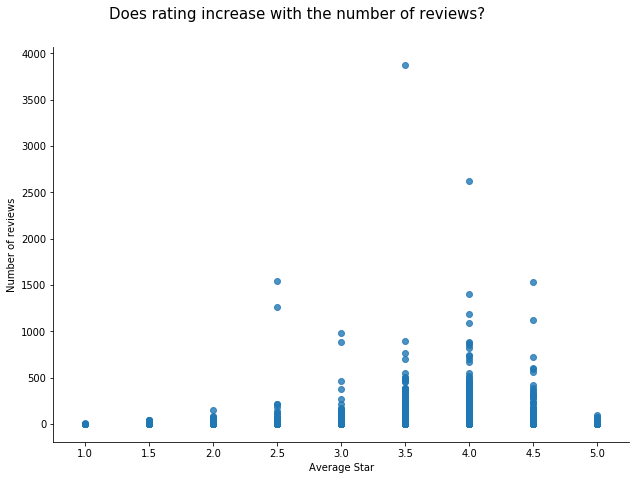

In [94]:
# Does rating increase with the number of reviews? The first scatter plot of number of reviews against  average star. 

g = (sns.lmplot('average_star', 'review_count', data =rest_all_types, fit_reg=False).set_axis_labels("Average Star", 
            "Number of reviews"))
g.fig.set_size_inches(10,7)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Does rating increase with the number of reviews?", size =15)
g.savefig('Fig10-ReviewVSStar.png')
plt.show()

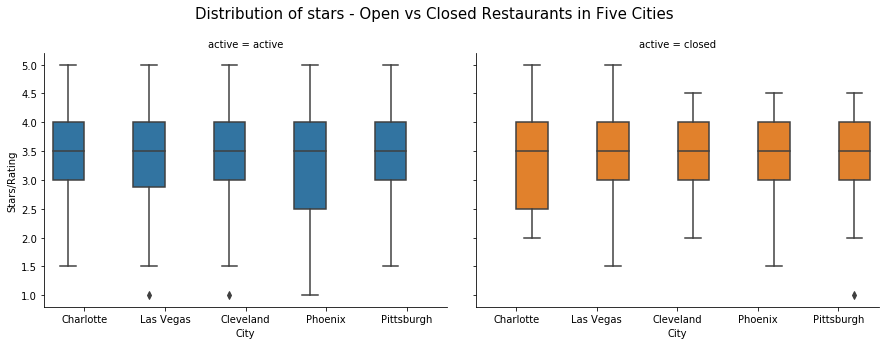

In [51]:
# Distribution of stars - Open vs Closed Restaurants in Five Cities

g = (sns.factorplot(x="city", y="average_star",hue="active", col = 'active', data=rest_all_types, kind="box").set_axis_labels(
    "City", "Stars/Rating"))
g.fig.set_size_inches(13,5)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of stars - Open vs Closed Restaurants in Five Cities", 
               size =15)
g.savefig('Fig1-BoxPlot of Stars.png')
plt.show()

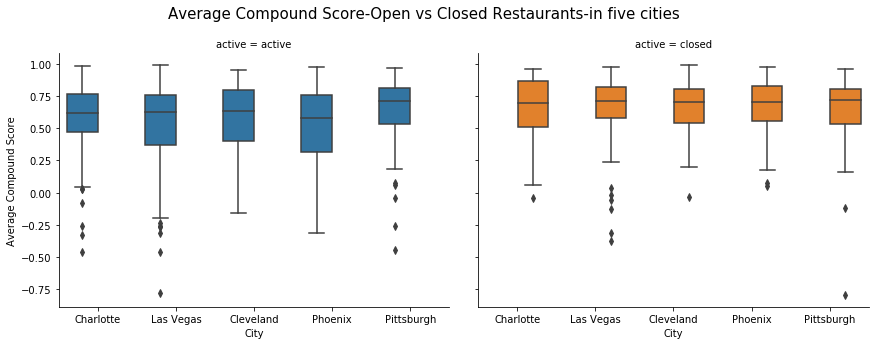

In [52]:
# Facted graph: Box plot of average compound score-open vs closed restaurants-in five cities

g = (sns.factorplot(x="city", y="avg_compound",hue="active", col = 'active', data=rest_all_types, kind="box").set_axis_labels(
    "City", "Average Compound Score"))
g.fig.set_size_inches(13,5)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average Compound Score-Open vs Closed Restaurants-in five cities", 
               size =15)
g.savefig('Fig2-BoxPlot-AvgCompound.png')
plt.show()

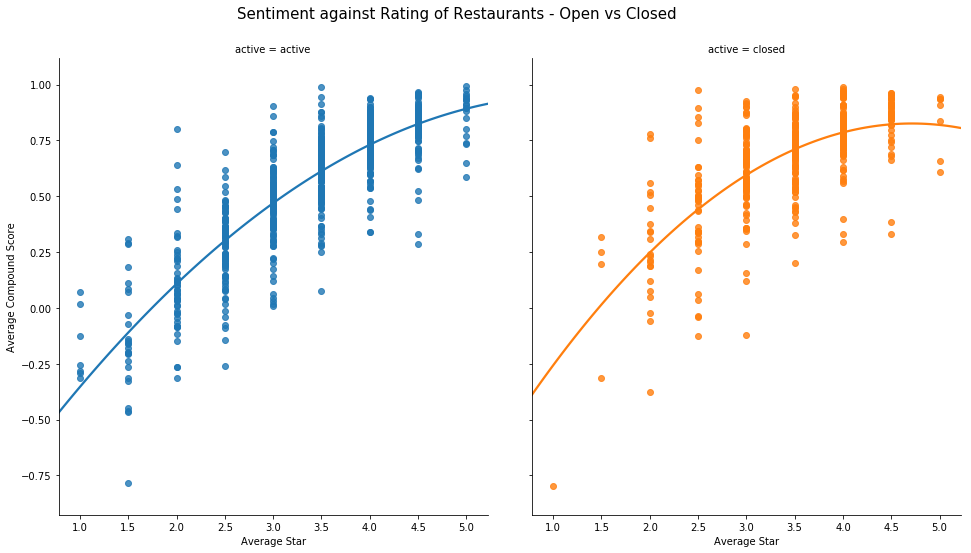

In [85]:
# Sentiments expressed by reviewers (measured by average compound score, plotted against average star of the restaurants 

g = sns.FacetGrid(rest_all_types, col = 'active', hue= 'active')
g = (g.map(sns.regplot, 'average_star', 'avg_compound', order=2, ci=None).set_axis_labels("Average Star", 
            "Average Compound Score"))
g.fig.set_size_inches(15,9)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sentiment against Rating of Restaurants - Open vs Closed", size =15)
g.savefig('Fig3-AvgCompoundVsStar-ActClose_City.png')
plt.show()

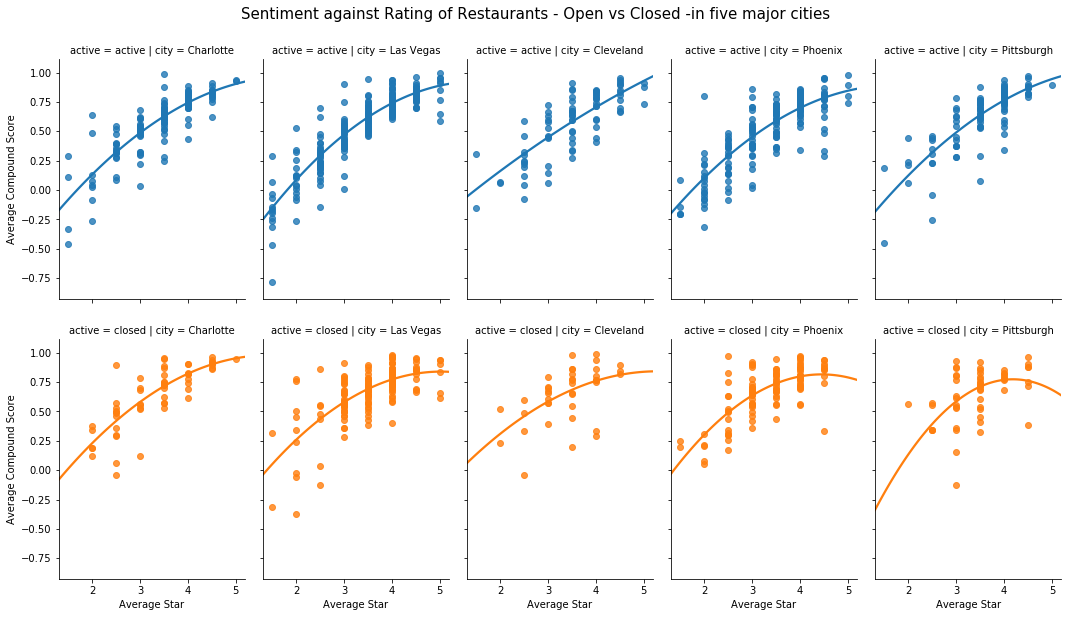

In [86]:
# Facted graph: scatter plot of average compound score vs average star of the open and closed restaurants in five cities 

g = sns.FacetGrid(rest_all_types, col = 'city', row = 'active', hue= 'active')
g = (g.map(sns.regplot, 'average_star', 'avg_compound', order=2, ci=None).set_axis_labels("Average Star", 
            "Average Compound Score"))
g.fig.set_size_inches(15,9)
#g.despine(offset=10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sentiment against Rating of Restaurants - Open vs Closed -in five major cities", size =15)
g.savefig('Fig4-AvgCompoundVsStar-ActClose_City.png')
plt.show()

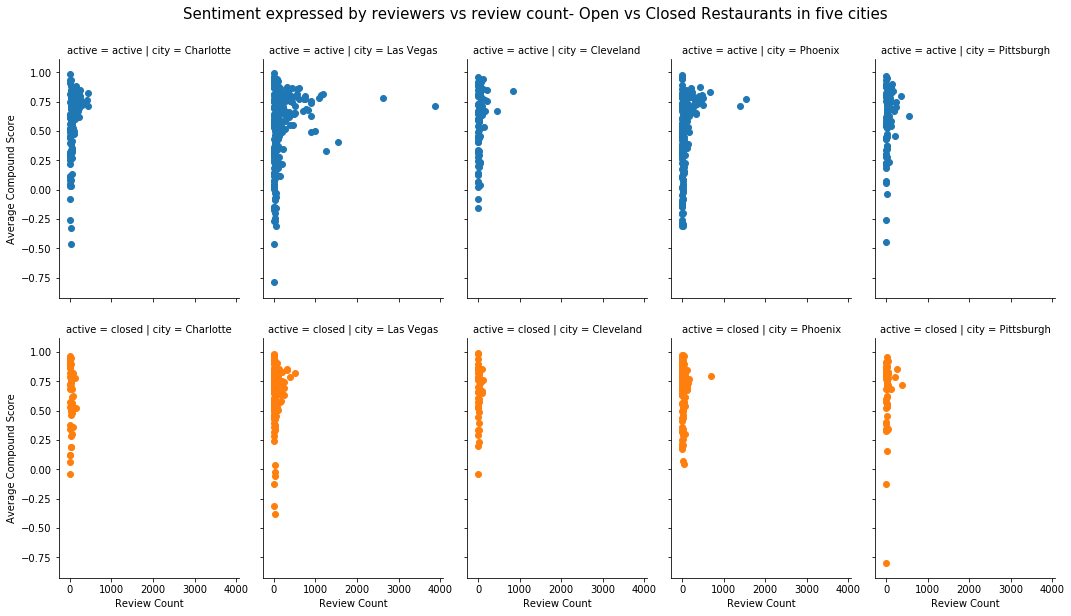

In [55]:
# Sentiment expressed by reviewers vs review count- Open vs Closed Restaurants in five cities

g = sns.FacetGrid(rest_all_types, col = 'city', row = 'active', hue = 'active')
g = (g.map(plt.scatter, "review_count", "avg_compound").set_axis_labels("Review Count", "Average Compound Score"))
g.fig.set_size_inches(15,9)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sentiment expressed by reviewers vs review count- Open vs Closed Restaurants in five cities", 
               size =15)
g.savefig('Fig5-AvgCompound-Vs-Review_AllTypes.png')
plt.show()

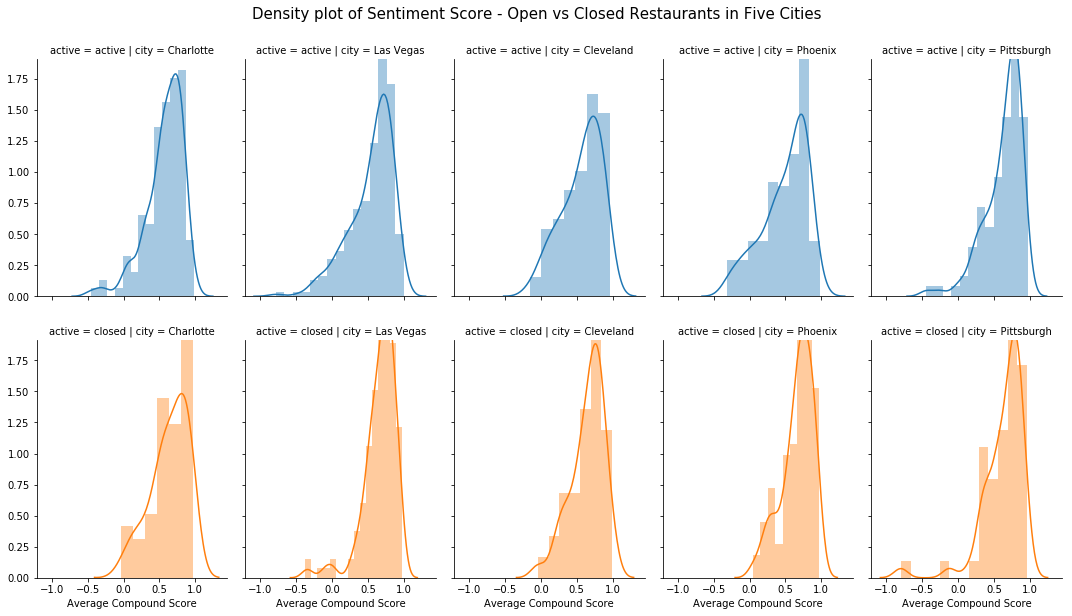

In [56]:
# Density plot of Sentiment Score - Open vs Closed Restaurants in Five Cities

g = sns.FacetGrid(rest_all_types, col="city", row = 'active', hue= 'active')
g = (g.map(sns.distplot, "avg_compound").set_xlabels("Average Compound Score"))
g.fig.set_size_inches(15,9)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Density plot of Sentiment Score - Open vs Closed Restaurants in Five Cities", 
               size =15)
g.savefig('Fig6-DensityPlot-AvgCompound-AllTypes.png')
plt.show()

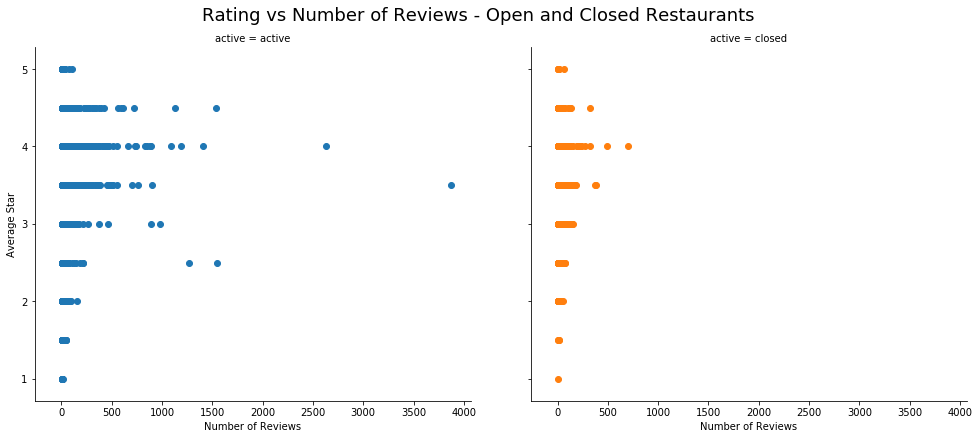

In [98]:
# Scatter plot of Rating vs Number of Reviews - Open and Closed Restaurants

g = sns.FacetGrid(rest_all_types, col = 'active', hue= 'active')
g = (g.map(plt.scatter, 'review_count', 'average_star').set_axis_labels("Number of Reviews", 
            "Average Star"))
g.fig.set_size_inches(15,7)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rating vs Number of Reviews - Open and Closed Restaurants", size =18)
g.savefig('Fig7-AvgCompoundVsStar-ActClose_City.png')
plt.show()

# Final Comments

# References

1. Link for the source of the Yelp data 
https://www.yelp.com/dataset

2. Seaborn tutorial on scatter plot 
https://chrisalbon.com/python/seaborn_scatterplot.html

3. Link to seaborn library on faceted graph 
https://seaborn.pydata.org/tutorial/axis_grids.html

4. Link to seaborn for linear fitting to scatter plot 
https://seaborn.pydata.org/generated/seaborn.regplot.html

5. Few stackoverflow links to nice plotting using seaborn library 
https://stackoverflow.com/questions/29637150/scatterplot-without-linear-fit-in-seaborn

6. Link to advance funcationality of seaborn library 
https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6